<a href="https://colab.research.google.com/github/byungkim0068/ITC/blob/main/Copy_of_ITC_ModelingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dr Oliviero Andreussi, olivieroandreuss@boisestate.edu

Boise State University, Department of Chemistry and Biochemistry

# Fitting and Data Analysis of the Isothermal Titration Calorimetry (ITC) Experiments {-}

In [14]:
# Import the main modules used in this worksheet
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [15]:
# These modules are needed to draw chemical formulas
!pip install rdkit cirpy
from rdkit import Chem
from rdkit.Chem import Draw
import cirpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 31.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for cirpy: filename=CIRpy-1.0.2-py3-none-any.whl size=7263 sha256=a3efc71b8c4cb471a63216dff69e8023ce9c5dfe2277a6dded489384baf83365
  Stored in directory: /root/.cache/pip/wheels/c7/35/2b/f5d2226974fb5b1e84d53eda475d8b33a38548a6b25e32c2c0
Successfully built cirpy


Given the CAS number of a compound, we can convert it into a smile using a couple of alternative approaches. We can use the `Cirpy` module (you may need to install it first using `pip install cirpy`)

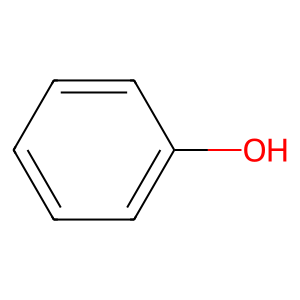

In [ ]:
smiles = cirpy.resolve('108-95-2', 'smiles')
display(Draw.MolToImage( Chem.MolFromSmiles(smiles), size=(300, 300) ))

Alternatively we can use a website from NIH to get the smiles from CAS numbers as follows:

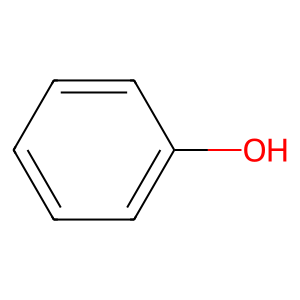

In [16]:
from urllib.request import urlopen
cas = '108-95-2'
url = 'http://cactus.nci.nih.gov/chemical/structure/' + cas + '/smiles'
smiles = urlopen(url).read().decode('utf8')
display(Draw.MolToImage( Chem.MolFromSmiles(smiles), size=(300, 300) ))

# Plotting and Fitting ITC Curves {-}

In [17]:
# Load the google drive with your files
from google.colab import drive
drive.mount('/content/drive')
# The following needs to be the path of the folder with all your datafile in .csv format
path='/content/drive/MyDrive/Colab Notebooks/ITC_Data/'
file_Ca_int='CaCl2_EDTA_integrated.csv'
file_Mg_int='MgCl2_EDTA_integrated.csv'
file_Ca_raw='CaCl2_EDTA_raw.csv'
file_Mg_raw='MgCl2_EDTA_raw.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


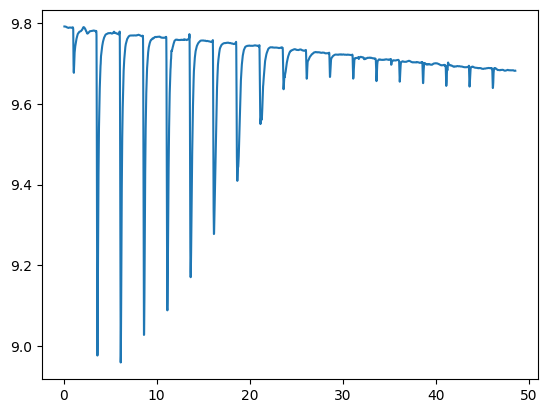

In [18]:
Ca_raw=pd.read_csv(path+file_Ca_raw,header=0,names=['X','Y'])
plt.plot(Ca_raw['X'],Ca_raw['Y'])

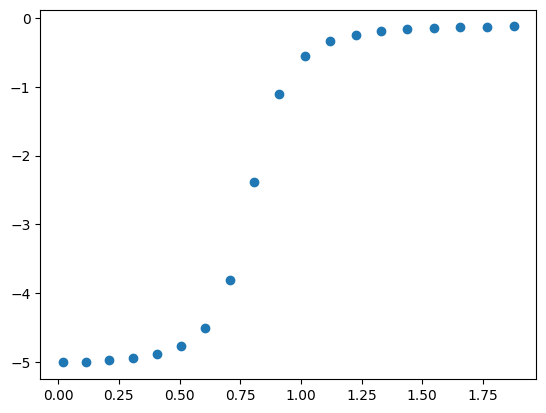

In [19]:
Ca_int=pd.read_csv(path+file_Ca_int,header=0,names=['Xfit','Yfit','X','Y'])
plt.scatter(Ca_int['Xfit'],Ca_int['Yfit'])

In [30]:
import scipy.optimize

In [31]:
from scipy.optimize import curve_fit
def func(x, a, b, c,d):
    return a * np.tanh(b * (x-d)) + c

    # Define the data to be fit with some noise:

In [32]:
p0 = (2.43736712, 1.        , -3, 0.9) # this are the starting values of the parameters of the function
params, cv = scipy.optimize.curve_fit(func, Ca_int['Xfit'],Ca_int['Yfit'],p0)

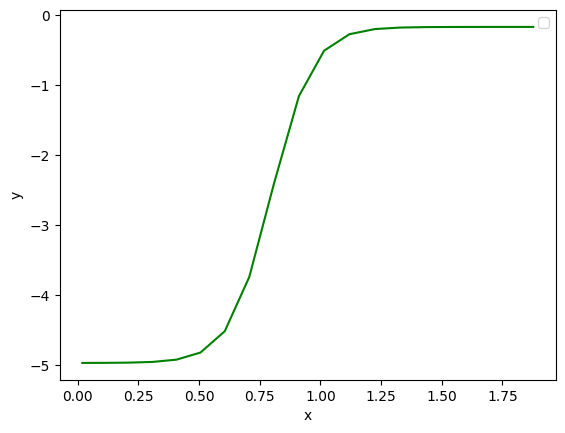

In [35]:
params
np.array([2.43736712, 1.        , -3, 0.9])
plt.plot(Ca_int['Xfit'], func(Ca_int['Xfit'], *params), 'g-')
label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(params)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()